# Requirements

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import random

# Problem setting

If each individual in a population has a probability of producing offspring, will that population survive or not?

The distribution of offspring for each individual is specified as a list, e.g., `[0, 0, 1, 1, 2]`.  So an individual will produce no offspring with probability $2/5$, have one child with probability $2/5$ and two children with probability $1/5$.

# Implementation

The size of the next generation is determined by the current population size, and the distribution.

In [4]:
def compute_next_generation(population_size, children_distr):
    new_population_size = 0
    for _ in range(population_size):
        new_population_size += random.choice(children_distr)
    return new_population_size

For example, when we start with a single individual.

In [9]:
children_distr = [0, 0, 1, 1, 2, 2, 3]
population_size = 1
for generation in range(1, 21):
    population_size = compute_next_generation(population_size, children_distr)
    print(f'{generation:3d}: {population_size}')

  0: 1
  1: 2
  2: 4
  3: 9
  4: 11
  5: 16
  6: 20
  7: 34
  8: 48
  9: 64
 10: 81
 11: 103
 12: 147
 13: 212
 14: 272
 15: 336
 16: 446
 17: 560
 18: 737
 19: 978


Clearly, the population grows.

To experiment a bit further, we write a function that returns two lists, one with the number of the generation, the other with the corresponding size of that generation.  This way, we can create a plot.

In [22]:
def compute_generations(children_distr, nr_generations):
    generations = list(range( nr_generations + 1))
    population_sizes = [1]
    for _ in generations[1:]:
        population_sizes.append(compute_next_generation(population_sizes[-1], children_distr))
    return generations, population_sizes

Let's try it with the following distribution.

In [23]:
die_out_distr = [0, 0, 1, 2]

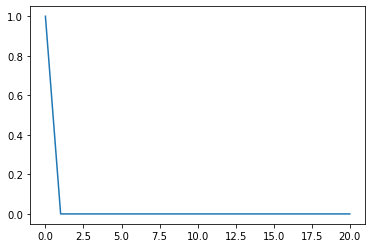

In [29]:
generations, population_sizes = compute_generations(die_out_distr, 20)
plt.plot(generations, population_sizes)

They seem to die out.

Combining this into a function for convenience.

In [30]:
def plot_generations(distr, nr_generations):
    generations, population_sizes = compute_generations(distr, nr_generations)
    plt.plot(generations, population_sizes)

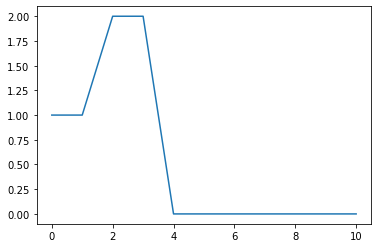

In [31]:
plot_generations(die_out_distr, 10)

Let's try a different distribution that is a bit more favorable to survival.

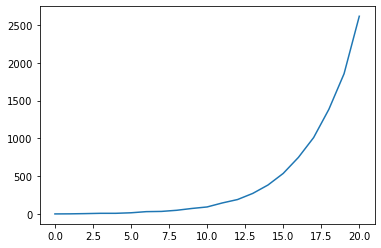

In [32]:
viable_distr = [0, 0, 1, 1, 2, 2, 2, 3]
plot_generations(viable_distr, 20)